<a href="https://colab.research.google.com/github/OtavioBer/ProjAplicadoIII/blob/OtavioBer-patch-1/Projeto_Aplicado_III_An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

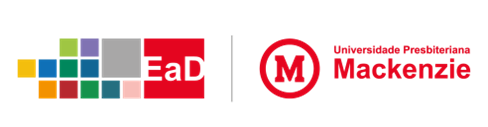

#<font color=blue>Projeto Aplicado III - Análise Exploratória
#Para desenvolvimento de Sistema de Recomendação de Livros

CURSO: Tecnologia em Ciências de Dados

SEMESTRE: 4º

COMPONENTE CURRICULAR / TEMA: Projeto Aplicado III

NOME DO PROFESSOR: THIAGO DONIZETTI DOS SANTOS

INTEGRANTES E TIA:

1. Caroline Ribeiro Ferreira - 10408052
2. Lais César Fonseca - 10407066
3. Leonardo dos Reis Olher – 10407752
4. Liliane Gonçalves de Brito Ferraz - 10407087
5. Múcio Emanuel Feitosa Ferraz Filho - 10218691
6. Otavio Bernardo Scandiuzzi - 10407867

##<font color=blue>OBJETIVO

Desenvolver um Sistema de Recomendações de Livros eficiente e inovador, aplicando técnicas avançadas de recomendação para proporcionar sugestões personalizadas aos usuários. Além disso, busca-se:
- Construir uma plataforma interativa que permita aos usuários interagirem entre si, compartilhando recomendações, resenhas e insights literários.
- Analisar e avaliar criticamente diferentes abordagens de recomendação, propondo melhorias e ajustes conforme necessário.
- Aumentar o engajamento dos usuários e estimular o hábito da leitura, com o intuito de contribuir para a formação de uma comunidade de leitores mais diversificada, tornando a leitura mais inclusiva e abrangente, contribuir para uma sociedade mais informada, empática e culturalmente enriquecida.

Através desses objetivos, almejamos não apenas criar um sistema eficaz de recomendação de livros, mas também fomentar uma comunidade engajada e apaixonada pela leitura. Esses elementos fundamentais formam a base do nosso projeto, delineando a trajetória que percorreremos para alcançar nossos objetivos e oferecer uma solução valiosa no universo literário contemporâneo.


## Análise Explorátoria dos Dados

In [ ]:
# Importando bibliotecas e pacotes a serem utilizados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import ast
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar o arquivo de livros e visualizar as primeiras linhas
livros = pd.read_csv("/content/drive/My Drive/Projeto Aplicado III/BX_Books.csv", encoding="ISO-8859-1", sep=";")
livros.head(3)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [ ]:
#Verificar quantidade de linhas e colunas do dataframe de livros
livros.shape

(271379, 8)

In [ ]:
#Verificar valores únicos de cada atributo do dataframe de livros
livros.nunique()

ISBN                   271379
Book-Title             242154
Book-Author            102028
Year-Of-Publication       116
Publisher               16806
Image-URL-S            271063
Image-URL-M            271063
Image-URL-L            271063
dtype: int64

In [ ]:
# Importar o arquivo de usuarios e visualizar as primeiras linhas
usuarios = pd.read_csv("/content/drive/My Drive/Projeto Aplicado III/BX-Users.csv", encoding="ISO-8859-1", sep=";")
usuarios.head(3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [ ]:
#Verificar quantidade de linhas e colunas do dataframe de usuários
usuarios.shape

(278858, 3)

In [ ]:
#Verificar valores únicos de cada atributo do dataframe de usuários
usuarios.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [ ]:
# Importar o arquivo de notas e visualizar as primeiras linhas
notas = pd.read_csv("/content/drive/My Drive/Projeto Aplicado III/BX-Book-Ratings.csv", encoding="ISO-8859-1", sep=";")
notas.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [ ]:
#Verificar quantidade de linhas e colunas do dataframe de avaliações
notas.shape

(1149780, 3)

In [ ]:
#Verificar valores únicos de cada atributo do dataframe de avaliações
notas.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [ ]:
# Unificar as bases de usuarios e notas, utilizando a chave de User-ID.
df = pd.merge(usuarios, notas [['User-ID', 'ISBN', 'Book-Rating' ]], on='User-ID', how='left')
df.head(3)

,User-ID,Location,Age,ISBN,Book-Rating
0,1,"nyc, new york, usa",NaN,NaN,NaN
1,2,"stockton, california, usa",18.0,0195153448,0.0
2,3,"moscow, yukon territory, russia",NaN,NaN,NaN


In [ ]:
# Unificar as bases de usuarios e notas (df), com a base de livros, utilizando a chave de ISBN.
df2 = pd.merge(df, livros [['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S' ]], on='ISBN', how='left')
df2.head(3)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
0,1,"nyc, new york, usa",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"stockton, california, usa",18.0,0195153448,0.0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
2,3,"moscow, yukon territory, russia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Definindo o número máximo de comando para separação do atributo Location
max_columns = 3

In [ ]:
#Função para separar a string e retornar uma lista com o máximo de colunas definida no comando anterior
def split_Location(Location):
  return Location.split(',', max_columns - 1)

In [ ]:
#Convertendo a lista no dataframe
news_columns= df2['Location'].apply(split_Location)

In [ ]:
#Atribuindo o nome das novas colunas conforme separação
news_columns = pd.DataFrame(news_columns.tolist(), columns=[f'Location_{i+1}' for i in range(max_columns)])

In [ ]:
#Concatenando as lista dos novos atributos ao dataframe geral
df2 = pd.concat([df2, news_columns], axis=1)

In [ ]:
#Renomeando as novas colunas do dataframe com os seus respectivos nomes.
df2.rename(columns={'Location_1': 'Cidade' , 'Location_2': 'Estado' , 'Location_3': 'País'}, inplace=True)
df2.head(3)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Cidade,Estado,País
0,1,"nyc, new york, usa",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,0195153448,0.0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moscow,yukon territory,russia


#<font color=green>Conhecendo o Metadados

In [ ]:
#Verificar quantidade de linhas e colunas do dataframe
df2.shape

(1323355, 13)

In [ ]:
#Verificar os atributos do dataframe
df2.columns.to_list()

['User-ID',
 'Location',
 'Age',
 'ISBN',
 'Book-Rating',
 'Book-Title',
 'Book-Author',
 'Year-Of-Publication',
 'Publisher',
 'Image-URL-S',
 'Cidade',
 'Estado',
 'País']

In [ ]:
#Verificar os tipos dos atributos do dataframe
df2.dtypes

User-ID                  int64
Location                object
Age                    float64
ISBN                    object
Book-Rating            float64
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
Image-URL-S             object
Cidade                  object
Estado                  object
País                    object
dtype: object

In [ ]:
#Verificar informações estatísticas do dataframe
df2.describe()

,User-ID,Age,Book-Rating,Year-Of-Publication
count,1.323355e+06,946277.000000,1.149780e+06,1.031175e+06
mean,1.402573e+05,36.912856,2.866950e+00,1.968194e+03
std,8.054875e+04,14.273762,3.854184e+00,2.311048e+02
min,1.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,7.022200e+04,28.000000,0.000000e+00,1.992000e+03
50%,1.407720e+05,35.000000,0.000000e+00,1.997000e+03
75%,2.107735e+05,45.000000,7.000000e+00,2.001000e+03
max,2.788580e+05,244.000000,1.000000e+01,2.050000e+03


In [ ]:
#Verificar valores únicos de cada atributo do dataframe
df2.nunique()

User-ID                278858
Location                57339
Age                       165
ISBN                   340556
Book-Rating                11
Book-Title             241090
Book-Author            101593
Year-Of-Publication       116
Publisher               16728
Image-URL-S            269861
Cidade                  32770
Estado                   6334
País                     1276
dtype: int64

In [ ]:
# Verificar valores nulos do dataframe
df2.isnull().sum()

User-ID                     0
Location                    0
Age                    377078
ISBN                   173575
Book-Rating            173575
Book-Title             292180
Book-Author            292181
Year-Of-Publication    292180
Publisher              292182
Image-URL-S            292180
Cidade                      0
Estado                      1
País                        2
dtype: int64

In [ ]:
#Verificar as informações de um atributo do dataframe
df2.loc[0]

User-ID                                 1
Location               nyc, new york, usa
Age                                   NaN
ISBN                                  NaN
Book-Rating                           NaN
Book-Title                            NaN
Book-Author                           NaN
Year-Of-Publication                   NaN
Publisher                             NaN
Image-URL-S                           NaN
Cidade                                nyc
Estado                           new york
País                                  usa
Name: 0, dtype: object

In [ ]:
# Criar função para classificar a faixa etária
def faixa_etaria(Age):
    if pd.isna(Age):
      return 'Não Informado'
    elif 0 <= Age <= 6:
       return 'Não Informado'
    elif 7 <= Age <= 19:
         return '7-19'
    elif 20 <= Age <= 29:
        return '20-29'
    elif 30 <= Age <= 39:
        return '30-39'
    elif 40 <= Age <= 49:
         return '40-49'
    elif 50 <= Age <= 59:
        return '50-59'
    elif 60 <= Age <= 69:
         return '60-69'
    else:
         return 'Acima de 70'
    return Age

# criar novas colunas para faixa etária
df2['faixa_etaria'] = df2['Age'].apply(faixa_etaria)

df2['faixa_etaria'].value_counts()

Não Informado    380532
30-39            298617
20-29            249432
40-49            182975
50-59            113334
7-19              51155
60-69             37488
Acima de 70        9822
Name: faixa_etaria, dtype: int64

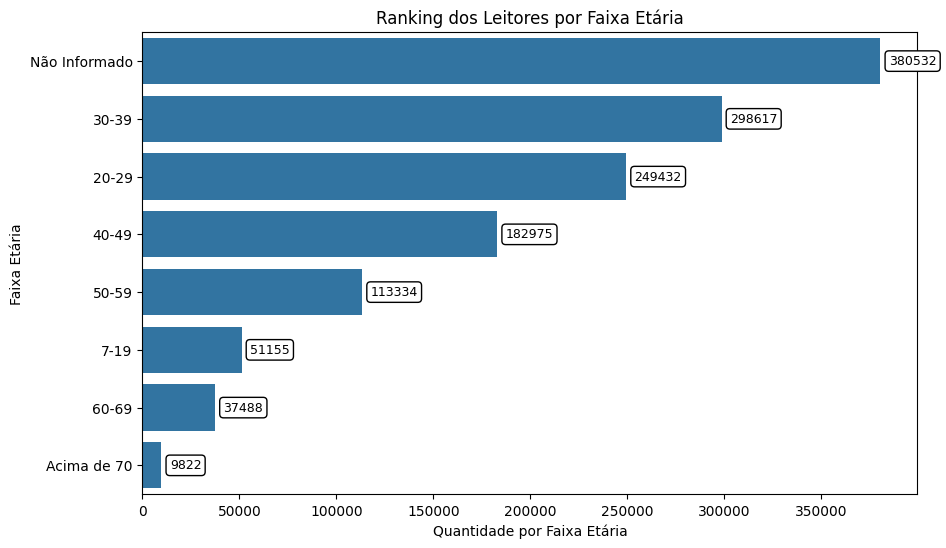

In [ ]:
def values(grafico): # FUNÇÃO PLOTAR VALORES BAR PLOT
    for container in grafico.containers:
        grafico.bar_label(container, label_type="edge", color="black",
                     padding=6,
                     fontsize=9,
                     bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'white', 'edgecolor': 'black'})

# Criar uma visualização gráfica do rankin de usuários por faixa etária.
ranking_faixa_etaria = df2['faixa_etaria'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
p = sns.countplot(y='faixa_etaria', data=df2 , order=ranking_faixa_etaria.index)
values(p)
plt.title('Ranking dos Leitores por Faixa Etária')
plt.xlabel('Quantidade por Faixa Etária')
plt.ylabel('Faixa Etária')
plt.show()

In [ ]:
#Quantidades de usúarios do Brasil
df2.loc[(df2['País'] == ' brazil'),'País'].value_counts()

 brazil    2851
Name: País, dtype: int64

In [ ]:
#Criar variavel de frequencia e percentual
frequencia = df2['País'].value_counts()
percentual = df2['País'].value_counts(normalize = True)*100

#Criar um dataframe com as variaveis criadas
dist_freq_qualitativa = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual })
dist_freq_qualitativa.rename_axis('País', axis = 'columns', inplace = True)
#Identifacando o dataframe criado com as informações de frequência e percentual por país
dist_freq_qualitativa

País,Frequência,Porcentagem(%)
usa,846391,63.958067
canada,115352,8.716646
united kingdom,61876,4.675699
germany,50383,3.807223
spain,34929,2.639432
...,...,...
"region of capital / bratislava, slovakia",1,0.000076
.,1,0.000076
"maharashtra, india, india",1,0.000076
dfg,1,0.000076


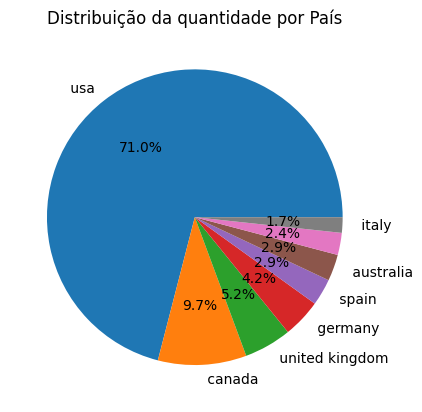

In [ ]:
# Contagem por País
País = df2['País'].value_counts()
top_paises = País.head(8)

# Criar gráfico de pizza
fig, ax = plt.subplots()
ax.pie(top_paises, labels=top_paises.index, autopct='%1.1f%%')
ax.set_title('Distribuição da quantidade por País')

plt.show()

In [ ]:
#Quantidade de livros por ano de publicação
livros.groupby(['Year-Of-Publication'])['Year-Of-Publication'].agg(['count'])

,count
Year-Of-Publication,
0,4619
1376,1
1378,1
1806,1
1897,1
...,...
2026,1
2030,7
2037,1


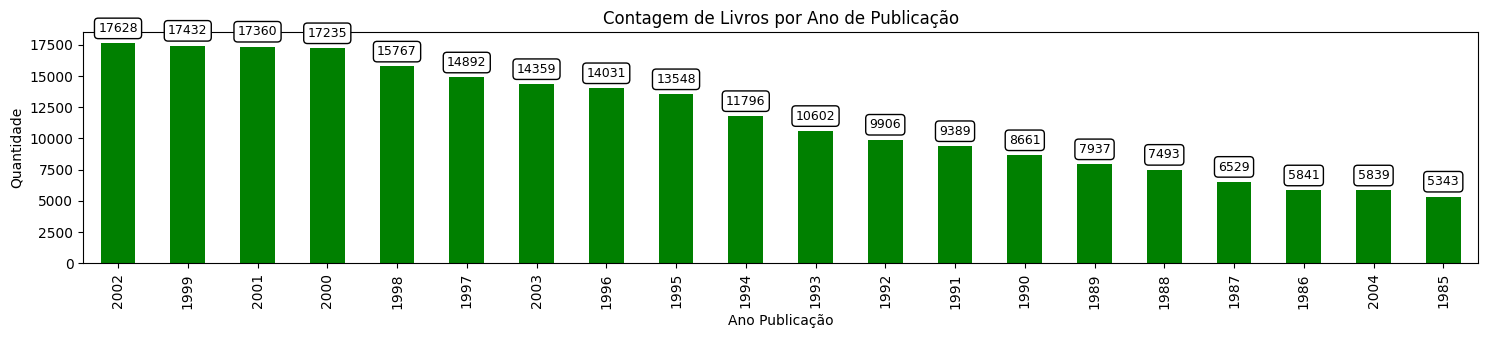

In [ ]:
plt.subplots(figsize=(18,3))

#Criar o calculo de quantidade de livros por ano de publicação
Ano_qtd = livros['Year-Of-Publication'].value_counts()
#Selecionar os top 20 anos de publicação
top_anos = Ano_qtd.head(20)

p = top_anos.plot(kind='bar', color='green')
values(p)

# Inserir titulo e nomes dos eixos X e Y
plt.xlabel('Ano Publicação')
plt.ylabel('Quantidade')
plt.title('Contagem de Livros por Ano de Publicação')


plt.show()

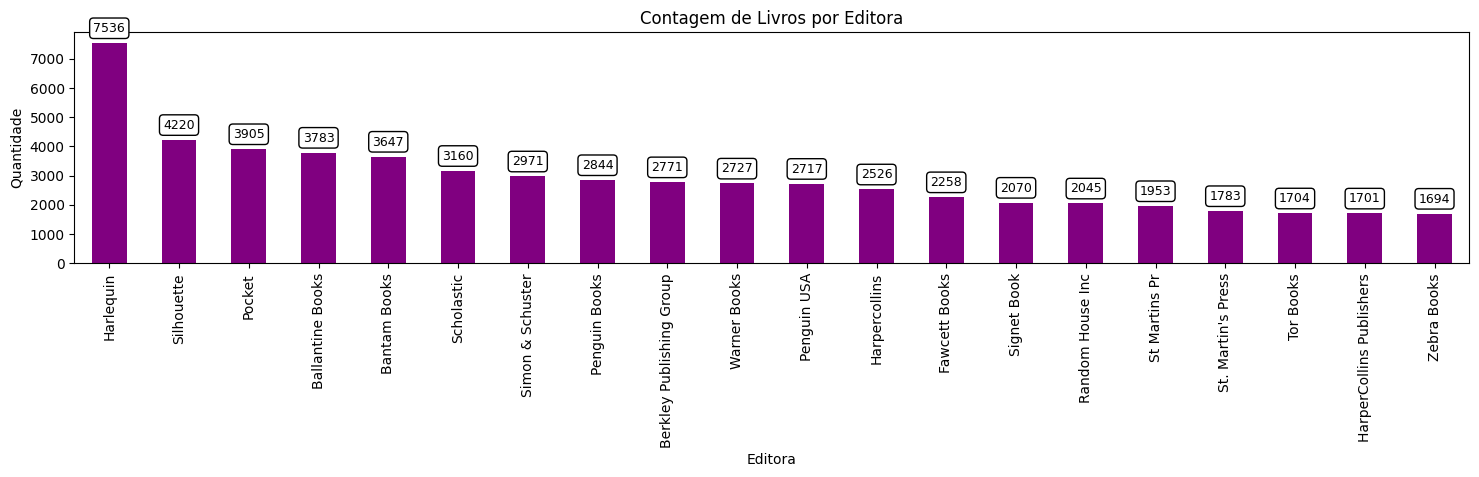

In [ ]:
plt.subplots(figsize=(18,3))

#Criar o calculo de quantidade de livros por editora
Editora_qtd = livros['Publisher'].value_counts()
#Selecionar os top 20 Editoras
top_editora = Editora_qtd.head(20)

p = top_editora.plot(kind='bar', color='purple')
values(p)

# Inserir titulo e nomes dos eixos X e Y
plt.xlabel('Editora')
plt.ylabel('Quantidade')
plt.title('Contagem de Livros por Editora')

plt.show()

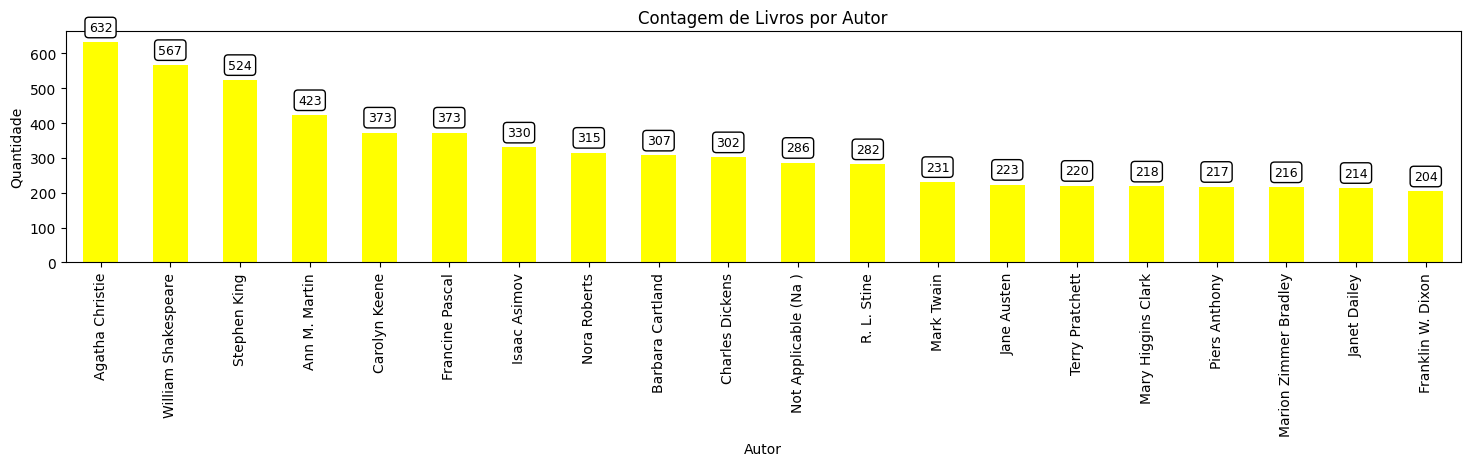

In [ ]:
plt.subplots(figsize=(18,3))

#Criar o calculo de quantidade de livros por autor
Autor_qtd = livros['Book-Author'].value_counts()
#Selecionar os top 20 Autor com mais livros publicados
top_autor = Autor_qtd.head(20)

p = top_autor.plot(kind='bar', color='yellow')
values(p)

# Inserir titulo e nomes dos eixos X e Y
plt.xlabel('Autor')
plt.ylabel('Quantidade')
plt.title('Contagem de Livros por Autor')

plt.show()

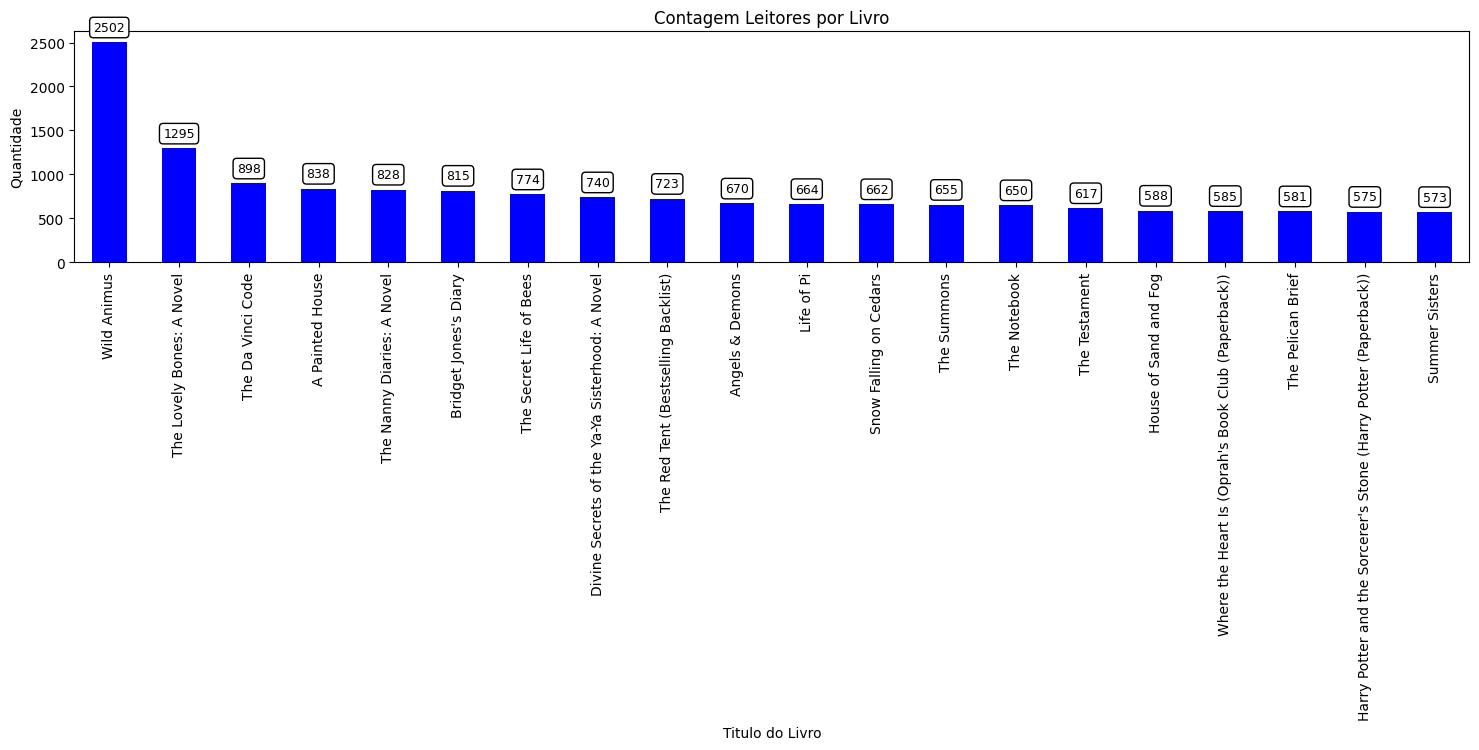

In [ ]:
plt.subplots(figsize=(18,3))

#Criar o calculo de quantidade de livros com mais leitores
Livro_qtd = df2['Book-Title'].value_counts()
#Selecionar os top 20 livros mais lidos
top_livros = Livro_qtd.head(20)

p = top_livros.plot(kind='bar', color='blue')
values(p)

# Inserir titulo e nomes dos eixos X e Y
plt.xlabel('Titulo do Livro')
plt.ylabel('Quantidade')
plt.title('Contagem Leitores por Livro')

plt.show()

#<font color=green>Tratamento dos dados

In [ ]:
# Verificando se há valores nulos
df2.isna().sum()

User-ID                     0
Location                    0
Age                    377078
ISBN                   173575
Book-Rating            173575
Book-Title             292180
Book-Author            292181
Year-Of-Publication    292180
Publisher              292182
Image-URL-S            292180
Cidade                      0
Estado                      1
País                        2
faixa_etaria                0
dtype: int64

In [ ]:
# Filtrando somente as colunas necessários e renomeando nome das variaveis
# Seleciona somente as variaveis que iremos utilizar
dados = df2 [['User-ID','Book-Rating','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'País', 'faixa_etaria']]
# Renomeia as variaveis
dados.rename(columns = {'User-ID':'ID_USUARIO','Book-Rating':'Avaliacao', 'Book-Title' : 'Nome_Livro' , 'Book-Author':'Autor_Livro',
                        'Year-Of-Publication' : 'Ano_Publicacao' , 'Publisher' : 'Editora', 'País' : 'País_usuario' ,
                        'faixa_etaria' : 'Faixa_etaria_usuario' }, inplace = True)
# Exibe as primeiras linhas do arquivo tratado
dados.head()


<ipython-input-83-211b9a773a63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.rename(columns = {'User-ID':'ID_USUARIO','Book-Rating':'Avaliacao', 'Book-Title' : 'Nome_Livro' , 'Book-Author':'Autor_Livro',


,ID_USUARIO,Avaliacao,Nome_Livro,Autor_Livro,Ano_Publicacao,Editora,País_usuario,Faixa_etaria_usuario
0,1,NaN,NaN,NaN,NaN,NaN,usa,Não Informado
1,2,0.0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,usa,7-19
2,3,NaN,NaN,NaN,NaN,NaN,russia,Não Informado
3,4,NaN,NaN,NaN,NaN,NaN,portugal,7-19
4,5,NaN,NaN,NaN,NaN,NaN,united kingdom,Não Informado


In [ ]:
# Verificando se há valores nulos
dados.isna().sum()

ID_USUARIO                   0
Avaliacao               173575
Nome_Livro              292180
Autor_Livro             292181
Ano_Publicacao          292180
Editora                 292182
País_usuario                 2
Faixa_etaria_usuario         0
dtype: int64

In [ ]:
# Remover os valores nulos
dados.dropna(inplace = True)

<ipython-input-126-6a02437c406e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.dropna(inplace = True)


In [ ]:
# Verificando se há valores nulos
dados.isna().sum()

ID_USUARIO                   0
Avaliacao               173575
Nome_Livro              292180
Autor_Livro             292181
Ano_Publicacao          292180
Editora                 292182
País_usuario                 2
Faixa_etaria_usuario         0
dtype: int64

In [ ]:
#Verificar quantidade de linhas e colunas do dataframe
dados.shape

(1323355, 8)

In [ ]:
# Verificando a quantidade de avaliacoes por usuarios
dados['ID_USUARIO'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
101404        1
101405        1
101406        1
101407        1
278858        1
Name: ID_USUARIO, Length: 278858, dtype: int64

In [ ]:
# Vamos pegar o ID_USUARIO somente de usuários que fizeram mais de 50 avaliações
Avaliacao = dados['ID_USUARIO'].value_counts() > 50
y = Avaliacao[Avaliacao].index
y.shape

(3371,)

In [ ]:
# Visualizando os usuarios selecionados
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            167521, 255648,  91130,  68846, 213119,  72296, 239486, 273587,
            244375, 271375],
           dtype='int64', length=3371)

In [ ]:
# Pegando somente avaliacoes dos usuarios que avaliaram mais de 50 vezes
dados = dados[dados['ID_USUARIO'].isin(y)]

In [ ]:
# Visualizando o tamanho do dataset com usuario com mais de 50 avaliações
dados.shape

(765672, 8)